In [6]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
pip install plotly-express

  Obtaining dependency information for plotly>=4.1.0 from https://files.pythonhosted.org/packages/df/79/c80174d711ee26ee5da55a9cc3e248f1ec7a0188b5e4d6bbbbcd09b974b0/plotly-5.17.0-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 495.5 kB/s eta 0:00:19
     - -------------------------------------- 0.2/9.2 MB 2.1 MB/s eta 0:00:05
     --- ------------------------------------ 0.7/9.2 MB 4.4 MB/s eta 0:00:02
     ------ --------------------------------- 1.5/9.2 MB 7.5 MB/s eta 0:00:02
     ---------- ----------------------------- 2.3/9.2 MB 9.3 MB/s eta 0:00:01
     ------------- -------------------------- 3.2/9.2 MB 11.3 MB/s eta 0:00:01
     ---------------------- ----------------- 5.2/9.2 MB 16.0 MB/s eta 0:00:01
     -------------------------- ------------- 6.0/9.2 MB 15.5 MB/s eta 0:00:01
     ---------------

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


In [45]:
pip install seaborn


     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/293.3 kB ? eta -:--:--
     ----- ------------------------------- 41.0/293.3 kB 495.5 kB/s eta 0:00:01
     ----------------------------- -------- 225.3/293.3 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 2.3 MB/s eta 0:00:00


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


## 1. Introduction:

## 2. Data Scourcing:
The Data Science's Salaries Dataset was taken from the original source on Kaggle[1], which was collected from ai-jobs.net, and open platform which records all information about Artificial Inteligent, Machine Learning, Data Science and Big Data jobs around the world.

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
import pycountry
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import pandas as pd
import plotly.express as px
from plotly import graph_objs as go
import seaborn as sns


### 2.1 Loading the Data Analyst's Salaries data



In [4]:
#Loading data
df = pd.read_csv('ds_salaries.csv')
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


The dataset has totals **3755 observation** and **11 different variables**.

| Variable Name      | Type of Variable | Explanation |
| ----------- | :-----------: | ----------- |
| `work_year`     | int       | The year that the salary was paid |
| `experience_level`   | chr        | The experience level in the job during that year|
| `employment_type`   | chr        | The employment type for the role |
| `job_title`   | chr       | The role worked in the listed year|
| `salary`   | int        | The total gross salary amount that the employee was paid|
| `salary_currency`   | chr        | The currency of the salary paid as an ISO 4217 currency code|
| `salaryinusd`   | int        | The total gross salary amount in USD currency|
| `employee_residence`   | chr        | Employee's primary country of residence during that work year as an ISO 3166 country code|
| `remote_ratio`   | chr        | The categories of ovarall amount of work done remotely|
| `company_location`   | chr        | The country of the employer's main office or contracting branch as an ISO 3166 country code|
| `company_size`   | chr        | The categories of the company's size during the given year|


### 2.2 Cleaning the dataset

#### 2.2.1 Handling data formatting issues:
The dataset include a lot of abbreviations, which use to simplify the data. However, these words is very hard to understand without having a solid knowledge of it. In the code below, I have organize the dataset by rename the abbreviations.

In [9]:
# Rename values:
df["experience_level"] = df["experience_level"].replace({
    "SE": "Senior",
    "EN": "Entry Level",
    "EX" : "Executive Level",
    "MI": "Mid/Intermediate Level"})

df["employment_type"] = df["employment_type"].replace({
    "FT": "Full-time",
    "PT": "Part-time",
    "CT": "Contract",
    "FL": "Freelance"})

df["company_size"] = df["company_size"].replace({
    "S":"Small",
    "M":"Medium",
    "L":"Large"})

df["remote_ratio"] = df["remote_ratio"].astype(str)
df["remote_ratio"] = df["remote_ratio"].replace({
    "100":"Remote",
    "50":"Hybrid",
    "0":"Onsite"})


In [11]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
df['job_category'] = df['job_title'].apply(assign_broader_category)

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Remote,ES,Large,Other
1,2023,Mid/Intermediate Level,Contract,ML Engineer,30000,USD,30000,US,Remote,US,Small,Machine Learning
2,2023,Mid/Intermediate Level,Contract,ML Engineer,25500,USD,25500,US,Remote,US,Small,Machine Learning
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Remote,CA,Medium,Data Science
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Remote,CA,Medium,Data Science


### 2.2.2 Handling missing and duplicate data

In [12]:
#Check null and Missing Values
missing_value_count = df.isnull().sum()
missing_value_count

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
job_category          0
dtype: int64

In [13]:
#Check unique value in each columns
for col in df.columns:
    num_distinct_values = len(df[col].unique())
    print (f"{col}: {num_distinct_values}")

work_year: 4
experience_level: 4
employment_type: 4
job_title: 93
salary: 815
salary_currency: 20
salary_in_usd: 1035
employee_residence: 78
remote_ratio: 3
company_location: 72
company_size: 3
job_category: 6


### 2.2.3 Wrangling dataset

Since we only interested in predicting the Data Scientist's Salaries based on `employment_type`, `experience_level`, `job_categories`, `company_location`, `remote_ratio`, and `company_size`, we only keep several interested columns to analyse the data above.

In [14]:
# Select columns needed
data = df.loc[:, ["work_year", "experience_level", "employment_type", "salary_in_usd", "remote_ratio", "company_location", "company_size", "job_category"]]
data.head()

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-time,85847,Remote,ES,Large,Other
1,2023,Mid/Intermediate Level,Contract,30000,Remote,US,Small,Machine Learning
2,2023,Mid/Intermediate Level,Contract,25500,Remote,US,Small,Machine Learning
3,2023,Senior,Full-time,175000,Remote,CA,Medium,Data Science
4,2023,Senior,Full-time,120000,Remote,CA,Medium,Data Science


## 3. Univariative Analysis:

### 3.1 Job Distribution:

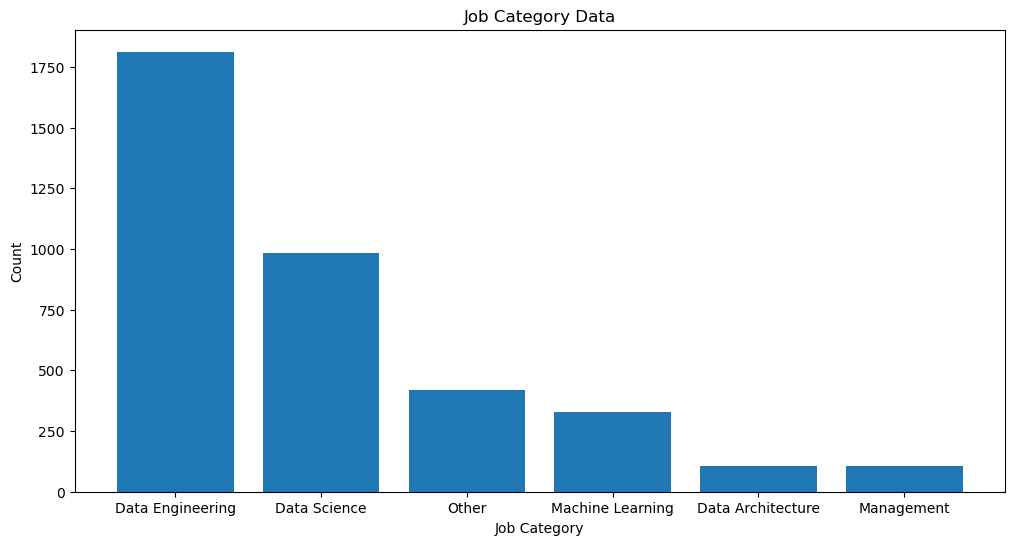

In [15]:
value_counts = data["job_category"].value_counts()

value_counts_values = value_counts.values[:]
value_counts_index = value_counts.index[:]

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(value_counts_index, value_counts_values)
ax.set_xlabel("Job Category")
ax.set_ylabel("Count")
ax.set_title("Job Category Data")
plt.show()

**Figure 3.1.1** Number of jobs in different categories

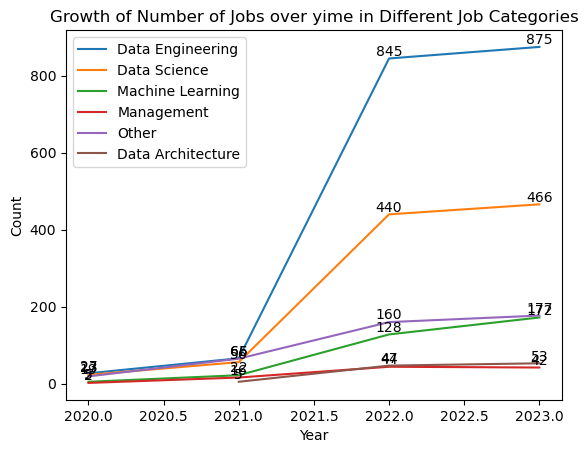

In [16]:
grouped_data = data.groupby(["work_year", "job_category"]).size().reset_index(name = "count")
fig, count_over_year = plt.subplots()
for category in grouped_data["job_category"].unique():
    category_data = grouped_data[grouped_data["job_category"] == category]
    count_over_year.plot(category_data["work_year"], category_data["count"], label = category)
    for x, y in zip(category_data["work_year"], category_data["count"]):
        plt.text(x, y, str(y), ha='center', va='bottom')

count_over_year.set_xlabel("Year")
count_over_year.set_ylabel("Count")
count_over_year.set_title("Growth of Number of Jobs over yime in Different Job Categories")
count_over_year.legend()
plt.show()

**Figure 3.1.2** Number of Jobs over time in Different Job Categories

### 3.2 Salaries Distribution

In [18]:
def tar_var_summary(data, target):
    fig = go.Figure()
    fig.add_trace(go.Violin(x=df[target], line_color='#6C9BCF', name='Happy', y0=0))
    fig.update_traces(orientation='h', side='positive', meanline_visible=False)
    fig.update_layout(title={'text': 'Distribution of the Salary in USD',
                             'y':0.9,
                             'x':0.5,
                             'xanchor':'center',
                             'yanchor':'top'},
                             barmode='overlay',
                             xaxis = dict(title = 'Salary in USD'),
                             yaxis=dict(title='Count'),
                             template = 'plotly_white')
    fig.show()
    
tar_var_summary(data, 'salary_in_usd')


**Figure 3.2.1** Overall distribution of Salary (in USD)

c:\Users\ANH_THU\miniforge3\envs\cpsc330\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\ANH_THU\miniforge3\envs\cpsc330\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\ANH_THU\miniforge3\envs\cpsc330\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



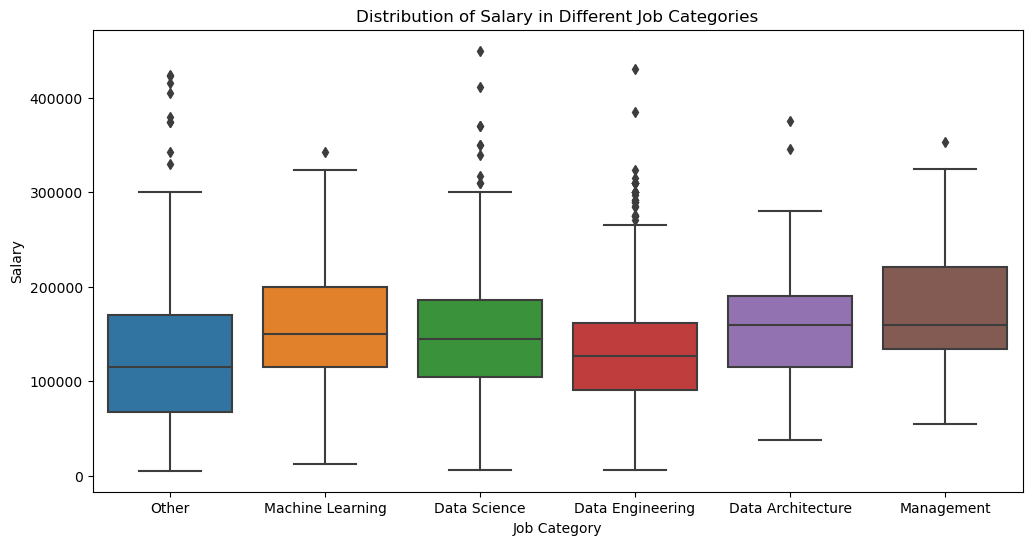

In [20]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = data, x = 'job_category', y = 'salary_in_usd')
plt.title('Distribution of Salary in Different Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Salary')
plt.show()